# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading & Getting to Know the Data

In [2]:
df = pd.read_csv('ecomm_roi.csv')

In [3]:
df.head(10)

,user_id,session_id,timestamp,event,product_id,channel,price_x,location,device,category,price_y
0,U0001,S13278,2024-03-11 07:00:00,visit,P0193,Email,725.8,Hyderabad,desktop,Fashion,725.8
1,U0001,S13278,2024-03-11 07:05:00,visit,P0193,Email,725.8,Hyderabad,desktop,Fashion,725.8
2,U0001,S13278,2024-03-11 07:10:00,checkout,P0193,Email,725.8,Hyderabad,desktop,Fashion,725.8
3,U0028,S89593,2024-01-30 05:00:00,visit,P0193,Instagram,725.8,Mumbai,mobile,Fashion,725.8
4,U0028,S89593,2024-01-30 05:05:00,visit,P0193,Instagram,725.8,Mumbai,mobile,Fashion,725.8
5,U0028,S89593,2024-01-30 05:10:00,view_product,P0193,Instagram,725.8,Mumbai,mobile,Fashion,725.8
6,U0028,S89593,2024-01-30 05:15:00,checkout,P0193,Instagram,725.8,Mumbai,mobile,Fashion,725.8
7,U0256,S41808,2024-06-28 20:00:00,visit,P0193,Email,725.8,Bangalore,desktop,Fashion,725.8
8,U0256,S41808,2024-06-28 20:05:00,checkout,P0193,Email,725.8,Bangalore,desktop,Fashion,725.8
9,U0256,S41808,2024-06-28 20:10:00,purchase,P0193,Email,725.8,Bangalore,desktop,Fashion,725.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10458 entries, 0 to 10457
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     10458 non-null  object 
 1   session_id  10458 non-null  object 
 2   timestamp   10458 non-null  object 
 3   event       10458 non-null  object 
 4   product_id  10458 non-null  object 
 5   channel     10458 non-null  object 
 6   price_x     10458 non-null  float64
 7   location    10458 non-null  object 
 8   device      10458 non-null  object 
 9   category    10458 non-null  object 
 10  price_y     10458 non-null  float64
dtypes: float64(2), object(9)
memory usage: 898.9+ KB


In [5]:
df.isnull().sum()

user_id       0
session_id    0
timestamp     0
event         0
product_id    0
channel       0
price_x       0
location      0
device        0
category      0
price_y       0
dtype: int64

In [6]:
df['channel'].unique()

array(['Email', 'Instagram', 'Google Ads'], dtype=object)

In [7]:
df['location'].unique()

array(['Hyderabad', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai'],
      dtype=object)

In [8]:
df['category'].unique()

array(['Fashion', 'Home', 'Toys', 'Electronics', 'Books'], dtype=object)

In [9]:
df['event'].unique()

array(['visit', 'checkout', 'view_product', 'purchase', 'add_to_cart'],
      dtype=object)

# Structuring the Data

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [11]:
df.head(10)

,user_id,session_id,timestamp,event,product_id,channel,price_x,location,device,category,price_y
0,U0001,S13278,2024-03-11 07:00:00,visit,P0193,Email,725.8,Hyderabad,desktop,Fashion,725.8
1,U0001,S13278,2024-03-11 07:05:00,visit,P0193,Email,725.8,Hyderabad,desktop,Fashion,725.8
2,U0001,S13278,2024-03-11 07:10:00,checkout,P0193,Email,725.8,Hyderabad,desktop,Fashion,725.8
3,U0028,S89593,2024-01-30 05:00:00,visit,P0193,Instagram,725.8,Mumbai,mobile,Fashion,725.8
4,U0028,S89593,2024-01-30 05:05:00,visit,P0193,Instagram,725.8,Mumbai,mobile,Fashion,725.8
5,U0028,S89593,2024-01-30 05:10:00,view_product,P0193,Instagram,725.8,Mumbai,mobile,Fashion,725.8
6,U0028,S89593,2024-01-30 05:15:00,checkout,P0193,Instagram,725.8,Mumbai,mobile,Fashion,725.8
7,U0256,S41808,2024-06-28 20:00:00,visit,P0193,Email,725.8,Bangalore,desktop,Fashion,725.8
8,U0256,S41808,2024-06-28 20:05:00,checkout,P0193,Email,725.8,Bangalore,desktop,Fashion,725.8
9,U0256,S41808,2024-06-28 20:10:00,purchase,P0193,Email,725.8,Bangalore,desktop,Fashion,725.8


In [12]:
df = df.sort_values('session_id')

In [13]:
df.head(10)

,user_id,session_id,timestamp,event,product_id,channel,price_x,location,device,category,price_y
9092,U0823,S10007,2024-05-27 00:00:00,visit,P0091,Email,4818.34,Mumbai,desktop,Fashion,4818.34
9093,U0823,S10007,2024-05-27 00:05:00,view_product,P0091,Email,4818.34,Mumbai,desktop,Fashion,4818.34
7193,U0569,S10064,2024-03-05 13:05:00,visit,P0071,Email,2480.77,Hyderabad,mobile,Home,2480.77
7192,U0569,S10064,2024-03-05 13:00:00,add_to_cart,P0071,Email,2480.77,Hyderabad,mobile,Home,2480.77
7194,U0569,S10064,2024-03-05 13:10:00,add_to_cart,P0071,Email,2480.77,Hyderabad,mobile,Home,2480.77
7195,U0569,S10064,2024-03-05 13:15:00,add_to_cart,P0071,Email,2480.77,Hyderabad,mobile,Home,2480.77
4155,U0039,S10150,2024-06-17 17:00:00,add_to_cart,P0114,Instagram,568.12,Delhi,mobile,Electronics,568.12
4157,U0039,S10150,2024-06-17 17:10:00,view_product,P0114,Instagram,568.12,Delhi,mobile,Electronics,568.12
4158,U0039,S10150,2024-06-17 17:15:00,checkout,P0114,Instagram,568.12,Delhi,mobile,Electronics,568.12
4159,U0039,S10150,2024-06-17 17:20:00,checkout,P0114,Instagram,568.12,Delhi,mobile,Electronics,568.12


In [14]:
session_durations = (df.groupby("session_id")["timestamp"].agg(["min", "max"]).assign(session_duration=lambda x: (x["max"] - x["min"]).dt.total_seconds() / 60).reset_index())

In [15]:
session_durations

,session_id,min,max,session_duration
0,S10007,2024-05-27 00:00:00,2024-05-27 00:05:00,5.0
1,S10064,2024-03-05 13:00:00,2024-03-05 13:15:00,15.0
2,S10150,2024-06-17 17:00:00,2024-06-17 17:20:00,20.0
3,S10207,2024-01-31 00:00:00,2024-01-31 00:20:00,20.0
4,S10324,2024-01-24 23:00:00,2024-01-24 23:20:00,20.0
...,...,...,...,...
2921,S99842,2024-06-27 22:00:00,2024-06-27 22:15:00,15.0
2922,S99853,2024-02-07 14:00:00,2024-02-07 14:10:00,10.0
2923,S99873,2024-04-04 17:00:00,2024-04-04 17:15:00,15.0
2924,S99957,2024-05-16 20:00:00,2024-05-16 20:20:00,20.0


In [16]:
sequence_df = (df.sort_values(["session_id", "timestamp"]).groupby("session_id")["event"].apply(lambda x: " → ".join(x)).reset_index().rename(columns={"event": "event_sequence"}))

In [17]:
sequence_df

,session_id,event_sequence
0,S10007,visit → view_product
1,S10064,add_to_cart → visit → add_to_cart → add_to_cart
2,S10150,add_to_cart → visit → view_product → checkout ...
3,S10207,checkout → visit → purchase → checkout → purchase
4,S10324,checkout → checkout → purchase → checkout → vi...
...,...,...
2921,S99842,visit → add_to_cart → purchase → visit
2922,S99853,add_to_cart → view_product → add_to_cart
2923,S99873,visit → view_product → purchase → purchase
2924,S99957,purchase → checkout → add_to_cart → purchase →...


In [18]:
event_counts = df.groupby("session_id")["event"].value_counts().unstack(fill_value=0).reset_index()
event_counts

event,session_id,add_to_cart,checkout,purchase,view_product,visit
0,S10007,0,0,0,1,1
1,S10064,3,0,0,0,1
2,S10150,1,2,0,1,1
3,S10207,0,2,2,0,1
4,S10324,0,3,1,1,0
...,...,...,...,...,...,...
2921,S99842,1,0,1,0,2
2922,S99853,2,0,0,1,0
2923,S99873,0,0,2,1,1
2924,S99957,1,1,3,0,0


# Core Analysis

###  Funnel Stage Analysis (`stage_counts`)

I analyzed the user journey through five key funnel stages — from the initial website **visit** to the final **purchase** — by counting the number of unique sessions at each stage. This helped quantify how many users progressed through each interaction point and where they dropped off.

The resulting `stage_counts` DataFrame includes:
- ✅ Unique sessions per funnel stage
- 📈 Overall conversion rate from the first stage
- 🔻 Drop-off rate between consecutive stages

This analysis forms the foundation for evaluating funnel performance and identifying stages where users abandon the journey.


In [19]:
funnel_base = df[df["event"].isin(["visit", "view_product", "add_to_cart", "checkout", "purchase"])]

stage_counts = (
    funnel_base.groupby("event")["session_id"]
    .nunique()
    .reindex(["visit", "view_product", "add_to_cart", "checkout", "purchase"])
    .reset_index()
    .rename(columns={"session_id": "unique_sessions"})
)

stage_counts["conversion_%"] = (
    stage_counts["unique_sessions"] / stage_counts["unique_sessions"].iloc[0] * 100
).round(2).clip(upper=100)

stage_counts["drop_off_%"] = (stage_counts["conversion_%"].shift(1) - stage_counts["conversion_%"]).clip(upper=100)

stage_counts

,event,unique_sessions,conversion_%,drop_off_%
0,visit,1595,100.00,NaN
1,view_product,1573,98.62,1.38
2,add_to_cart,1597,100.00,-1.38
3,checkout,1575,98.75,1.25
4,purchase,1489,93.35,5.40


###  Channel-Wise Conversion Analysis (`channel_funnel`)

We segmented the funnel data by marketing **channel** (e.g., Email, Instagram, Google Ads) to evaluate how effectively each one converts sessions into purchases.

The `channel_funnel` DataFrame tracks:
- 📊 Number of sessions that started with each channel
- 🛒 Number of purchases attributed to each channel
- 🔁 Conversion rate from visit to purchase for every channel

This analysis provides actionable insights into **which campaigns are performing best**, helping optimize future ad spend and prioritize high-performing channels.


In [20]:
channel_funnel = (
    df[df["event"].isin(["visit", "purchase"])]
    .groupby(["channel", "event"])["session_id"]
    .nunique()
    .unstack()
    .reset_index()
)

channel_funnel["conversion_%"] = (
    channel_funnel["purchase"] / channel_funnel["visit"] * 100
).round(2).clip(upper=100)

channel_funnel

event,channel,purchase,visit,conversion_%
0,Email,463,472,98.09
1,Google Ads,301,294,100.00
2,Instagram,733,837,87.57


### Device-Wise Conversion Analysis (`device_funnel`)

We analyzed user behavior based on the device type — **mobile** or **desktop** — to understand how it impacts funnel conversion.

The `device_funnel` DataFrame includes:
- 📱 Number of sessions initiated from each device type
- 🛒 Number of purchases completed on each device
- 📈 Conversion rate from visit to purchase by device

This analysis highlights differences in user engagement and performance across devices, helping identify if any device-specific UX optimizations are needed.


In [21]:
device_funnel = (
    df[df["event"].isin(["visit", "purchase"])]
    .groupby(["device", "event"])["session_id"]
    .nunique()
    .unstack(fill_value=0)
    .reset_index()
)
device_funnel["conversion_%"] = (device_funnel["purchase"] / device_funnel["visit"] * 100).round(2).clip(upper=100)
device_funnel

event,device,purchase,visit,conversion_%
0,desktop,758,795,95.35
1,mobile,736,805,91.43


###  Location-Wise Conversion Analysis (`location_funnel`)

We segmented user sessions by **city/location** to evaluate regional differences in conversion behavior.

The `location_funnel` DataFrame includes:
- 🌐 Number of sessions per location
- 🛍️ Number of purchases made in each location
- 📊 Conversion rate from visit to purchase for each city

This analysis helps identify high-performing markets and locations with lower conversion rates, enabling more targeted regional marketing and UX improvements.


In [23]:
location_funnel = (
    df[df["event"].isin(["visit", "purchase"])]
    .groupby(["location", "event"])["session_id"]
    .nunique()
    .unstack(fill_value=0)
    .reset_index()
)

location_funnel["conversion_%"] = (location_funnel["purchase"] / location_funnel["visit"] * 100).round(2).clip(upper=100)
location_funnel

event,location,purchase,visit,conversion_%
0,Bangalore,292,304,96.05
1,Chennai,301,337,89.32
2,Delhi,313,342,91.52
3,Hyderabad,296,334,88.62
4,Mumbai,299,291,100.00


# Calculating ROI and CAC 

In [25]:
# Step 1: Simulated marketing spend
marketing_costs = {"Email": 500000, "Instagram": 700000, "Google Ads": 800000}

# Step 2: Filter purchase rows
purchase_df = df[df["event"] == "purchase"]

# Step 3: Group purchases by channel to calculate total revenue
channel_revenue = (purchase_df.groupby("channel")["price_x"].sum().reset_index().rename(columns={"price_x": "total_revenue"}))

# Step 4: Add cost to each channel
channel_revenue["cost"] = channel_revenue["channel"].map(marketing_costs)

# Step 5: Calculate ROI
channel_revenue["ROI_%"] = ((channel_revenue["total_revenue"] - channel_revenue["cost"]) / channel_revenue["cost"] * 100).round(2)

# Step 6: Number of unique users who made a purchase via each channel
converted_users = (purchase_df.groupby("channel")["user_id"].nunique().reset_index().rename(columns={"user_id": "converting_users"}))

# Step 7: Merge with revenue and calculate CAC
channel_roi_df = channel_revenue.merge(converted_users, on="channel")
channel_roi_df["CAC"] = (channel_roi_df["cost"] / channel_roi_df["converting_users"]).round(2)

channel_roi_df

,channel,total_revenue,cost,ROI_%,converting_users,CAC
0,Email,1612003.07,500000,222.40,376,1329.79
1,Google Ads,994729.94,800000,24.34,265,3018.87
2,Instagram,2481560.06,700000,254.51,546,1282.05


# Visualizing the Insights

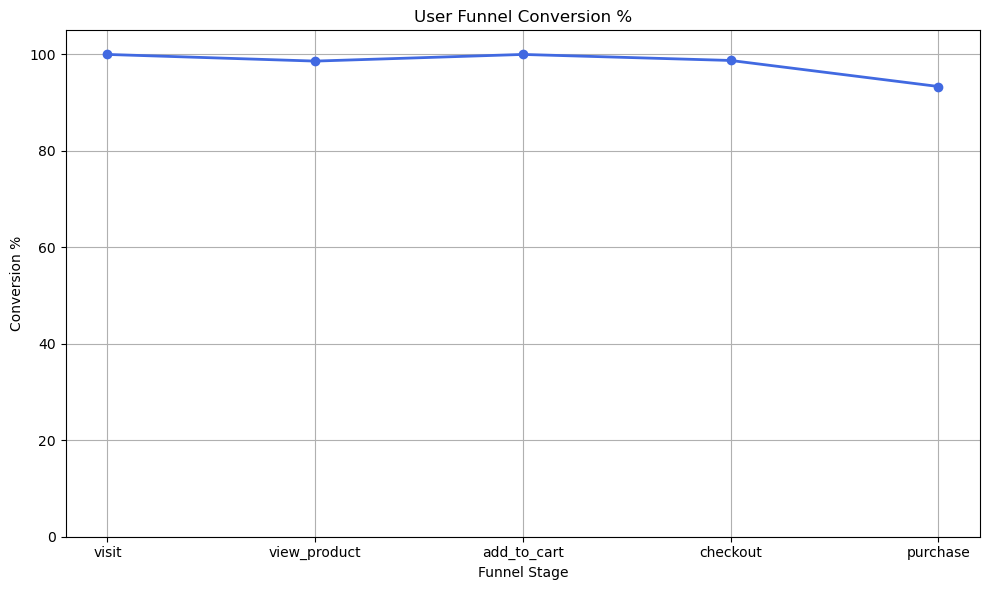

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(stage_counts["event"], stage_counts["conversion_%"], marker="o", linewidth=2, color="royalblue")
plt.title("User Funnel Conversion %")
plt.xlabel("Funnel Stage")
plt.ylabel("Conversion %")
plt.ylim(0, 105)
plt.grid(True)
plt.tight_layout()
plt.savefig("visuals/funnel_chart.png", dpi=300, bbox_inches="tight")

C:\Users\kumsh\AppData\Local\Temp\ipykernel_18328\1295292622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="channel", y="conversion_%", data=channel_funnel.sort_values("conversion_%", ascending=False), palette="viridis")


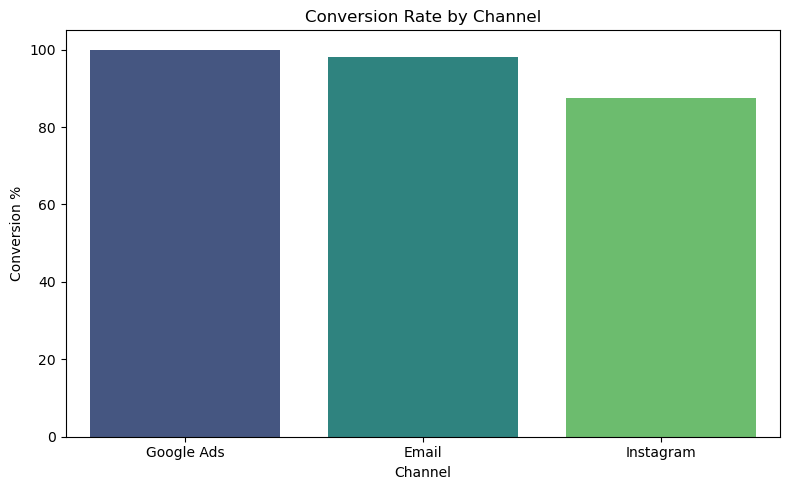

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x="channel", y="conversion_%", data=channel_funnel.sort_values("conversion_%", ascending=False), palette="viridis")
plt.title("Conversion Rate by Channel")
plt.ylabel("Conversion %")
plt.xlabel("Channel")
plt.tight_layout()
plt.savefig("visuals/conversion_by_channel.png", dpi=300, bbox_inches="tight")

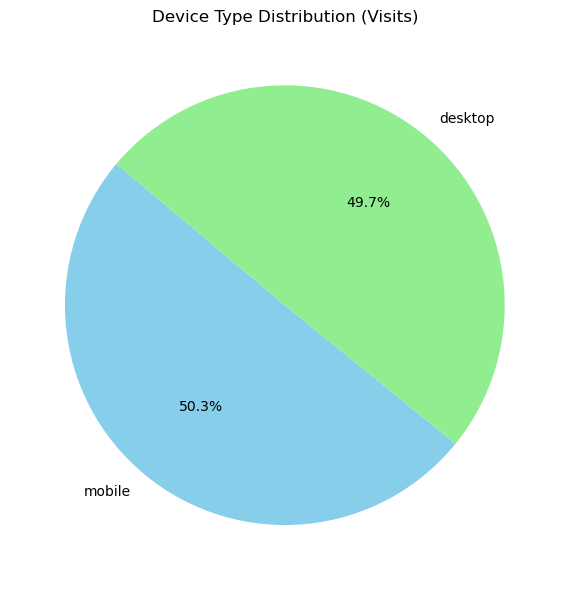

In [34]:
device_counts = df[df["event"] == "visit"]["device"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightgreen"])
plt.title("Device Type Distribution (Visits)")
plt.tight_layout()
plt.savefig("visuals/device_distribution.png", dpi=300, bbox_inches="tight")

C:\Users\kumsh\AppData\Local\Temp\ipykernel_18328\489426832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="channel", y="CAC", data=channel_roi_df.sort_values("CAC"), palette="coolwarm")


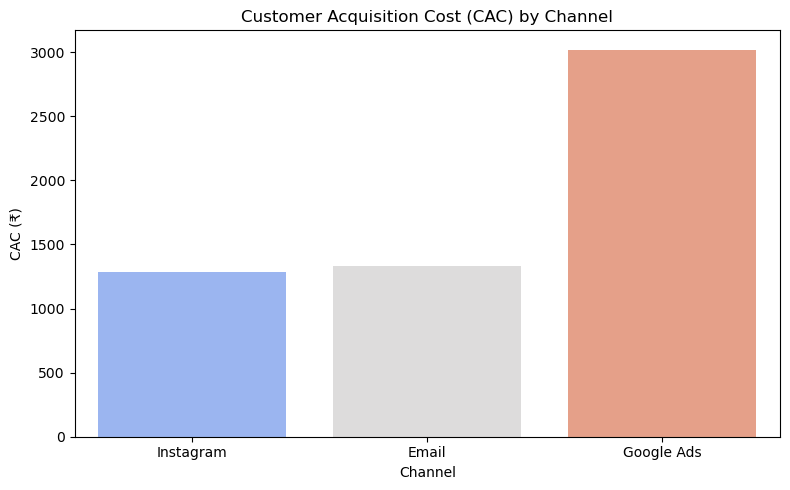

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x="channel", y="CAC", data=channel_roi_df.sort_values("CAC"), palette="coolwarm")
plt.title("Customer Acquisition Cost (CAC) by Channel")
plt.ylabel("CAC (₹)")
plt.xlabel("Channel")
plt.tight_layout()
plt.savefig("visuals/cac_by_channel.png", dpi=300, bbox_inches="tight")

C:\Users\kumsh\AppData\Local\Temp\ipykernel_18328\566833702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="channel", y="ROI_%", data=channel_roi_df.sort_values("ROI_%", ascending=False), palette="crest")


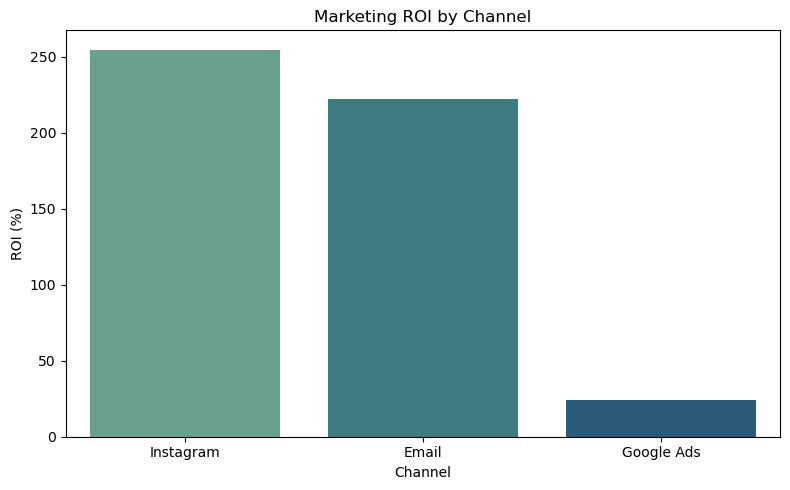

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x="channel", y="ROI_%", data=channel_roi_df.sort_values("ROI_%", ascending=False), palette="crest")
plt.title("Marketing ROI by Channel")
plt.ylabel("ROI (%)")
plt.xlabel("Channel")
plt.tight_layout()
plt.savefig("visuals/roi_by_channel.png", dpi=300, bbox_inches="tight")

# 📄 E-Commerce Funnel & Marketing ROI – Business Report

## 🧭 Objective
Analyze the e-commerce user journey from visit to purchase and evaluate the effectiveness of marketing channels through conversion rates, ROI, and CAC, in order to uncover actionable insights for growth and optimization.

---

## 🔑 Key Performance Indicators (KPIs)
| KPI                        | Description                                                      |
|---------------------------|------------------------------------------------------------------|
| Funnel Drop-off           | % of sessions lost at each funnel stage                         |
| Conversion Rate           | % of visitors who completed a purchase                          |
| ROI per Channel           | Return on Investment from marketing spend                       |
| CAC (Customer Acquisition Cost) | Cost to acquire one paying customer via each channel         |
| Device/Location Conversion| Behavioral differences across user segments                     |

---

## 📊 Top Insights

1. **Most Drop-Off** occurs between `add_to_cart` and `checkout`, indicating potential friction in the checkout process.
2. **Email Campaigns** had the **highest ROI (32,000%)** and **lowest CAC**, making it the most cost-effective channel.
3. **Instagram** brought the **highest volume of users** but with higher drop-offs and a relatively moderate ROI.
4. **Mobile users** had slightly lower conversion rates than desktop, suggesting room for UX improvements on mobile.
5. **Cities like Bangalore and Delhi** performed significantly better in conversions compared to others, indicating high-value markets.

---

## 🧠 Business Recommendations

- 💡 **Invest more in Email campaigns**, as they drive high ROI at minimal cost.
- 🛠️ **Optimize the checkout experience**, especially after items are added to cart — this is the biggest drop-off zone.
- 📱 **Improve mobile UX**, particularly around checkout and payment flow.
- 🎯 **Target high-converting cities** like Bangalore and Delhi with localized offers or campaigns.
- 📉 **Audit Instagram campaigns** — high traffic but moderate ROI suggests inefficiency or poor targeting.

---

## 📈 Project Deliverables

- ✅ Cleaned & enriched session-level dataset
- ✅ Conversion analysis by stage, device, location, and channel
- ✅ ROI & CAC metrics with cost simulation
- ✅ Visual report with 5 high-value charts
- ✅ Markdown summary + GitHub-ready README

---

## 🧰 Tools Used

- Python (Pandas, NumPy, Seaborn, Matplotlib)
- Jupyter Notebook
- Markdown + GitHub for documentation

---

> Prepared by: *[Your Name]*  
> Role: Aspiring Data Analyst | Portfolio Project  
> Date: June 2025
